In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/train.csv")
test_data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/test.csv")

# Check for missing values
print(data.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [2]:
print(data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  obje

In [3]:

# Convert 'Sex' to dummy variables

data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)


In [4]:
print(data.columns)
print(test_data.columns)


Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')
Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Sex_I', 'Sex_M'],
      dtype='object')


In [5]:
import pandas as pd

# Convert all object columns to numeric where possible
for column in data.select_dtypes(include=['object']).columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle NaN values (optional) - e.g., fill NaN with column mean
data.fillna(data.mean(), inplace=True)

# Verify the data types
print(data.dtypes)



id                  int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
Sex_I                bool
Sex_M                bool
dtype: object


In [6]:
print(data.head())

   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11  False  False  
1        0.3200     11  False  False  
2        0.0050      6   True  False  
3        0.2500     10  False   True  
4        0.1975      9   True  False  


In [7]:
# Check for missing values
print(data.isnull().sum())


id                0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
Sex_I             0
Sex_M             0
dtype: int64


In [8]:
print(test_data.head())

      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  
0          0.3125        0.3005  False   True  
1          0.2195        0.2750  False   True  
2          0.1845        0.2405  False   True  
3          0.1865        0.2350  False   True  
4          0.0670        0.1050   True  False  


In [9]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['Rings'])  # Features
y = data['Rings']                 # Target variable


In [10]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
 9   Sex_I           90615 non-null  bool   
 10  Sex_M           90615 non-null  bool   
dtypes: bool(2), float64(7), int64(2)
memory usage: 6.4 MB
None


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data (don't fit again)
X_test_scaled = scaler.transform(X_test)

#

X_test_scaled_original=scaler.transform(test_data)


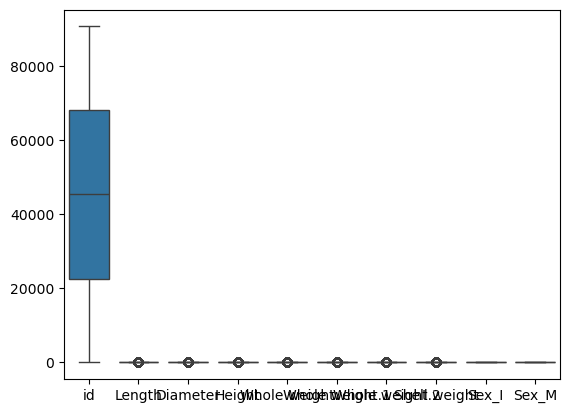

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplot
sns.boxplot(data=X_train)
plt.show()


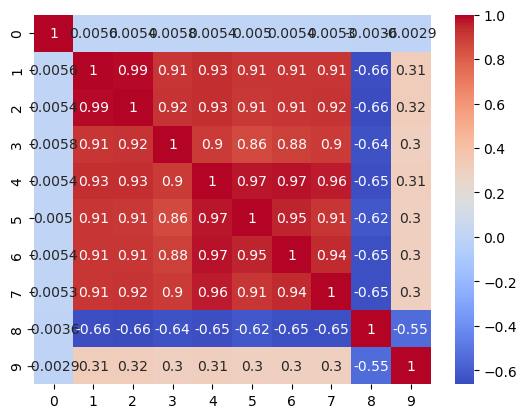

In [14]:
corr_matrix = pd.DataFrame(X_train_scaled).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


### GradientBoostingClassifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)

# Perform cross-validation to evaluate model performance
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print('Mean Accuracy: %.3f (%.3f)' % (gb_scores.mean(), gb_scores.std()))

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the training data
gb_predictions = gb_model.predict(X_train)

# Print the classification report
print(classification_report(y_train, gb_predictions))



Mean Accuracy: 0.343 (0.005)
              precision    recall  f1-score   support

           1       0.04      0.16      0.07        19
           2       0.16      0.24      0.19        21
           3       0.57      0.03      0.05       309
           4       0.52      0.62      0.57      1118
           5       0.45      0.57      0.50      2266
           6       0.43      0.28      0.34      4323
           7       0.43      0.50      0.46      7227
           8       0.41      0.57      0.48     11552
           9       0.31      0.59      0.40     13983
          10       0.19      0.12      0.15     10010
          11       0.34      0.31      0.33      6771
          12       0.33      0.00      0.00      3754
          13       0.23      0.01      0.02      3288
          14       0.37      0.00      0.01      1988
          15       1.00      0.00      0.00      1656
          16       0.23      0.07      0.11      1152
          17       0.21      0.04      0.06       92

n_estimators=10: This specifies the number of boosting stages. More estimators can improve performance but may also increase training time.
learning_rate=0.1: This controls how much each tree contributes to the final prediction. A smaller value would make the model more robust to overfitting but may require more trees.

Cross-validation is applied to estimate the model's performance using the training data.
The model is then fitted on the full training dataset.
Predictions are generated on the training data, and a classification report is printed to assess the model's performance.

Hyperparameter tuning can be done using GridSearchCV to optimize n_estimators, learning_rate, and max_depth for better performance.

Gradient Boosting Classifier has completed its run, but the results indicate a mean accuracy of 0.343, which is quite low, along with a macro average F1-score of 0.21. Here are some observations and possible next steps:
Many classes have low precision, recall, and F1-scores, indicating that the model struggles to correctly predict most of the classes, especially those with smaller support (fewer data points).

In [ ]:
Oversampling the minority classes using techniques like SMOTE (Synthetic Minority Oversampling Technique) can help the model pay more attention to underrepresented classes.
Lets adjust the class_weight parameter in your model to give more weight to minority classes.

In [36]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, class_weight='balanced')


TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'class_weight'